0.3547716052866999

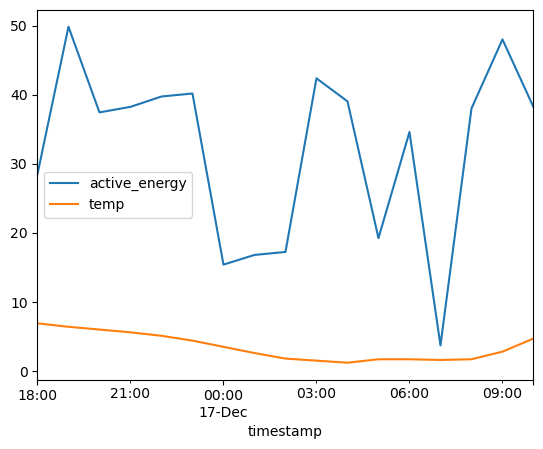

In [28]:
#CSV #1 household_power_consumption.csv
#Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
#16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000

#CSV #2 sceaux_hourly_temperatures.csv
#time;temp;dwpt;rhum;prcp;snow;wdir;wspd;wpgt;pres;tsun;coco
#2006-12-16 00:00:00;6.0;3.0;81.0;;;210.0;14.8;;1023.9;;

import pandas as pd

# Load the data
power = pd.read_csv('household_power_consumption.csv', delimiter=';', low_memory=False)
temp = pd.read_csv('sceaux_hourly_temperatures.csv', delimiter=';', low_memory=False)

# Limit data to first 1000 rows
power = power.head(1000)
temp = temp.head(1000)

# leave only date, time, global_active_power and sub_metering_* columns
power = power[['Date', 'Time', 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# parse numeric columns
power['Global_active_power'] = pd.to_numeric(power['Global_active_power'], errors='coerce')
power['Sub_metering_1'] = pd.to_numeric(power['Sub_metering_1'], errors='coerce')
power['Sub_metering_2'] = pd.to_numeric(power['Sub_metering_2'], errors='coerce')
power['Sub_metering_3'] = pd.to_numeric(power['Sub_metering_3'], errors='coerce')

# Convert the date and time columns to datetime
power['timestamp'] = pd.to_datetime(power['Date'] + ' ' + power['Time'], format='%d/%m/%Y %H:%M:%S')
temp['timestamp'] = pd.to_datetime(temp['time'], format='%Y-%m-%d %H:%M:%S')

power
# temp['time'] = pd.to_datetime(temp['time'])

# calculate 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
power['active_energy'] = (power['Global_active_power']*1000/60 - power['Sub_metering_1'] - power['Sub_metering_2'] - power['Sub_metering_3'])

# merge the two dataframes by timestamp
data = pd.merge(power, temp, on='timestamp', how='inner')
data

# ploe timeseries with active_energy and temp columns
import matplotlib.pyplot as plt
data.plot(x='timestamp', y=['active_energy', 'temp'])

# find correlation between active_energy and temp
data['active_energy'].corr(data['temp'])
